# Paper: A Mathematical Model of Anthrax Transmission in Animal Populations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# S, I, A, C

In [3]:
# r ,mu ,kappa ,eta_a ,eta_c ,eta_i ,tao ,gamma ,delta ,K ,beta ,sigma 

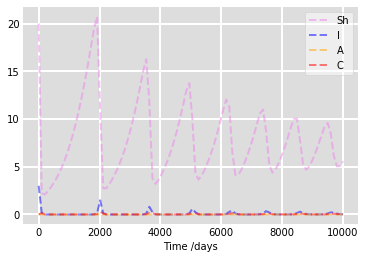

In [12]:
# Initial conditions

S0 = 20
I0 = 3
A0 = 0
C0 = 0

# A grid of time points (in days)
t = np.linspace(0, 10000, 100) 

#parameters
r = 1/300
mu = 1/600
kappa = 1/10
eta_a = 1/2
eta_c = 1/10
eta_i = 1/100
tao = 1/10
gamma = 1/7
delta = 1/20
K = 100
beta = 1/500
sigma = 1/10

# The SIR model differential equations.
def deriv(y, t, r ,mu ,kappa ,eta_a ,eta_c ,eta_i ,tao ,gamma ,delta ,K ,beta ,sigma ):
    S, I, A, C = y

    dSdt = r * (S + I) * (1 - (S + I)/K) - eta_a * A * S - eta_c * S * C - eta_i * (S * I)/(S + I) - mu * S + tao * I
    dIdt = eta_a * A * S + eta_c * S * C + (eta_i * (S * I)/(S + I) - (gamma + mu + tao)) * I
    dAdt = -sigma * A + beta * C
    dCdt = (gamma + mu) * I - delta * (S + I) * C - kappa * C
    
    return dSdt, dIdt, dAdt, dCdt


# Initial conditions vector
y0 = S0, I0, A0, C0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(r ,mu ,kappa ,eta_a ,eta_c ,eta_i ,tao ,gamma ,delta ,K ,beta ,sigma ))
S, I, A, C = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'violet', alpha=0.5, lw=2, label='Sh', linestyle='dashed')
ax.plot(t, I, 'blue', alpha=0.5, lw=2, label='I', linestyle='dashed')
ax.plot(t, A, 'orange', alpha=0.5, lw=2, label='A', linestyle='dashed')
ax.plot(t, C, 'red', alpha=0.5, lw=2, label='C', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [13]:
#save to csv file
a = np.asarray([t, S, I, A, C]) 

np.savetxt("anthrax.csv", a, delimiter=",")